<a href="https://colab.research.google.com/github/saikirankesoju/Data-Mining/blob/main/LAB_MLR_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("/content/multiple_linear_regression_dataset.csv")

In [7]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [8]:

df.shape


(20, 3)

In [9]:
print(df.corr())

                 age  experience    income
age         1.000000    0.615165  0.532204
experience  0.615165    1.000000  0.984227
income      0.532204    0.984227  1.000000


In [10]:
print(df.describe())

             age  experience        income
count  20.000000   20.000000     20.000000
mean   39.650000    6.200000  40735.500000
std    10.027725    4.124382   8439.797625
min    23.000000    1.000000  27840.000000
25%    31.500000    3.750000  35452.500000
50%    40.000000    5.000000  40190.000000
75%    47.000000    9.000000  45390.000000
max    58.000000   17.000000  63600.000000


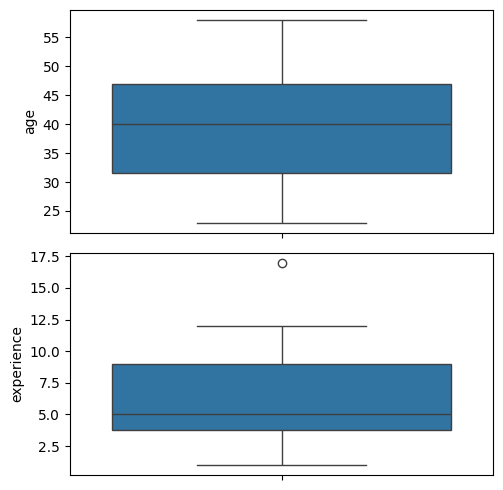

In [11]:
X = df[['age','experience']]
y = df['income']
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['age'], ax = axs[0])
plt2 = sns.boxplot(df['experience'], ax = axs[1])
plt.tight_layout()

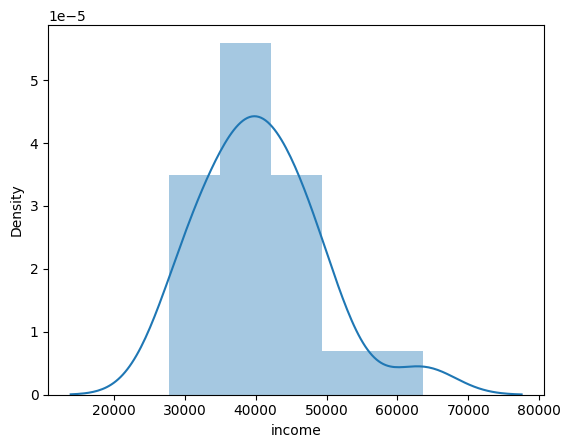

In [12]:
sns.distplot(df['income']);

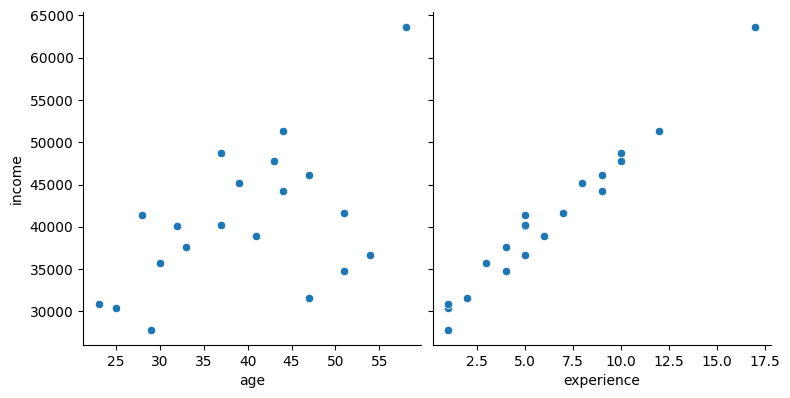

In [13]:
sns.pairplot(df, x_vars=['age', 'experience'], y_vars='income', height=4, aspect=1, kind='scatter')
plt.show()

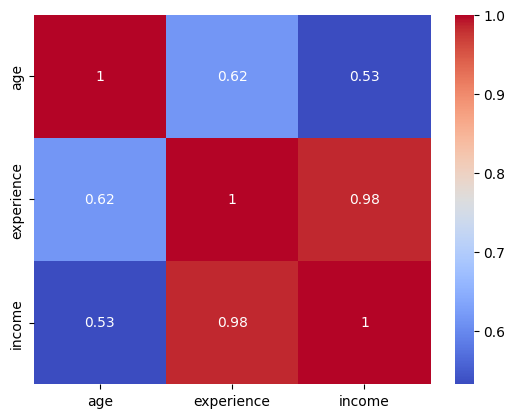

In [14]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [15]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train.shape


(14,)

In [16]:
y_test.shape

(6,)

In [17]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)
print('Intercept: ',reg_model.intercept_)
list(zip(X, reg_model.coef_))

Intercept:  30510.643844104634


[('age', np.float64(-79.68088640690299)),
 ('experience', np.float64(2167.573549181646))]

In [18]:
[('age', -79.68088640690299), ('experience', 2167.573549181646)]

[('age', -79.68088640690299), ('experience', 2167.573549181646)]

In [19]:
y_pred= reg_model.predict(X_test)
x_pred= reg_model.predict(X_train)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [30845.55700593 49238.18653887 46273.80412562 46512.84678484
 35117.21283408 39117.44677062]


In [20]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
17,30870,30845.557006
19,48700,49238.186539
11,46110,46273.804126
18,44190,46512.846785
13,34800,35117.212834
6,41340,39117.446771


In [21]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)


Mean Absolute Error: 931.5077511414116
Mean Square Error: 1792176.3379165696
Root Mean Square Error: 1338.7219046226776
